In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data1_castelmassa = pd.read_csv('Dati_po/Castelmassa.csv',sep=';',low_memory=False)
#Remove undesired columns
data1_castelmassa.drop('Selettiva', axis=1, inplace=True)
#Change weird column names
data1_castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
#Remove lines containing NAN


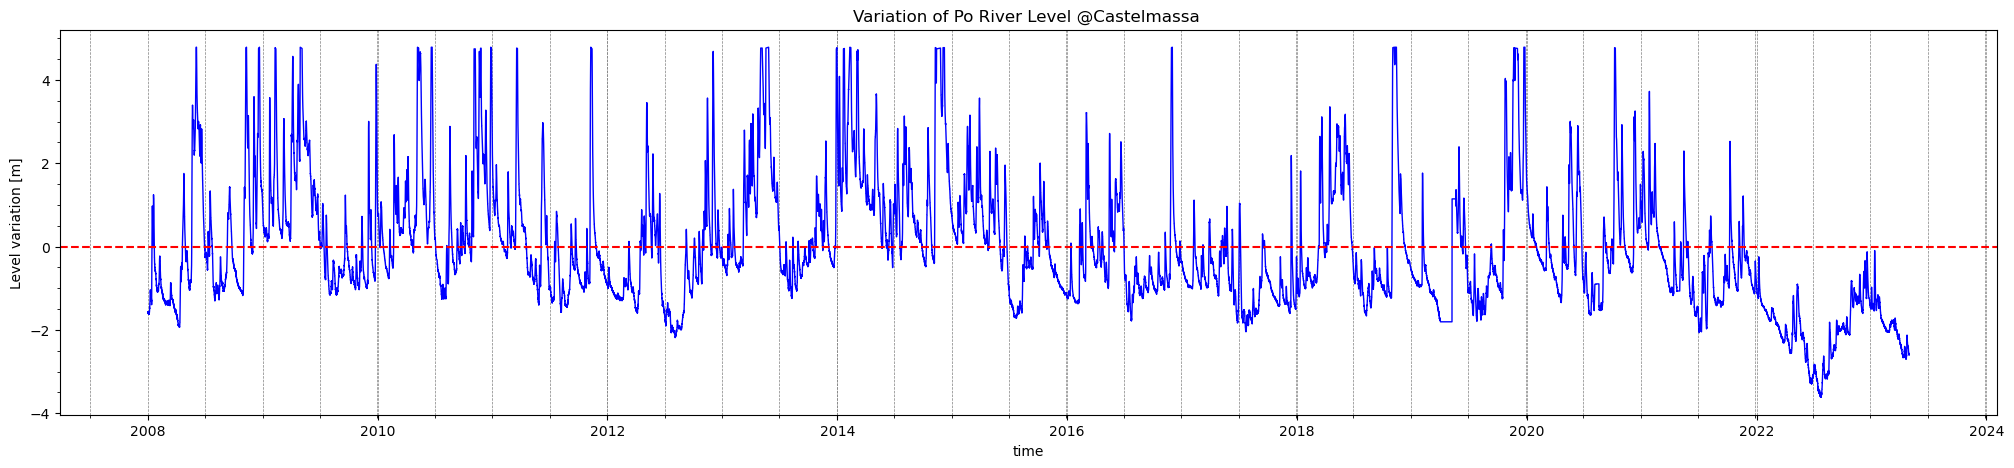

In [2]:
data1_castelmassa.dropna(inplace=True)
data1_castelmassa = data1_castelmassa.reset_index(drop=True)
#Have an idea of the dataset statistical characteristics
statistics=data1_castelmassa.describe()
#In case it gives error because of non numerical data
data1_castelmassa['Level'] = pd.to_numeric(data1_castelmassa['Level'], errors='coerce')
#Remove outliers
mean=np.mean(data1_castelmassa['Level'])
sigma = np.std(data1_castelmassa['Level'])

#Remove rows with z-score greater than 3
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']< mean+3*sigma]
#2121 vales are removed for castelmassa (original 131301)
#Now for smaller extremes
data1_castelmassa = data1_castelmassa[ data1_castelmassa['Level']> mean-3*sigma]
#no extremes removed for castelmassa

#Obtain the delta Level-Mean
data1_castelmassa['Delta'] = data1_castelmassa['Level']-mean
De=data1_castelmassa['Delta']
De = De.reset_index(drop=True)

#Rename the time
data1_castelmassa['Orario'] = pd.to_datetime(data1_castelmassa['Orario'])
# Add a new column with the year extracted from the 'date' column
data1_castelmassa['Year'] = data1_castelmassa['Orario'].dt.year

#Plot result

plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'],De,color='blue', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)


In [3]:
data1_castelmassa['month'] = [i.month for i in data1_castelmassa['Orario']]

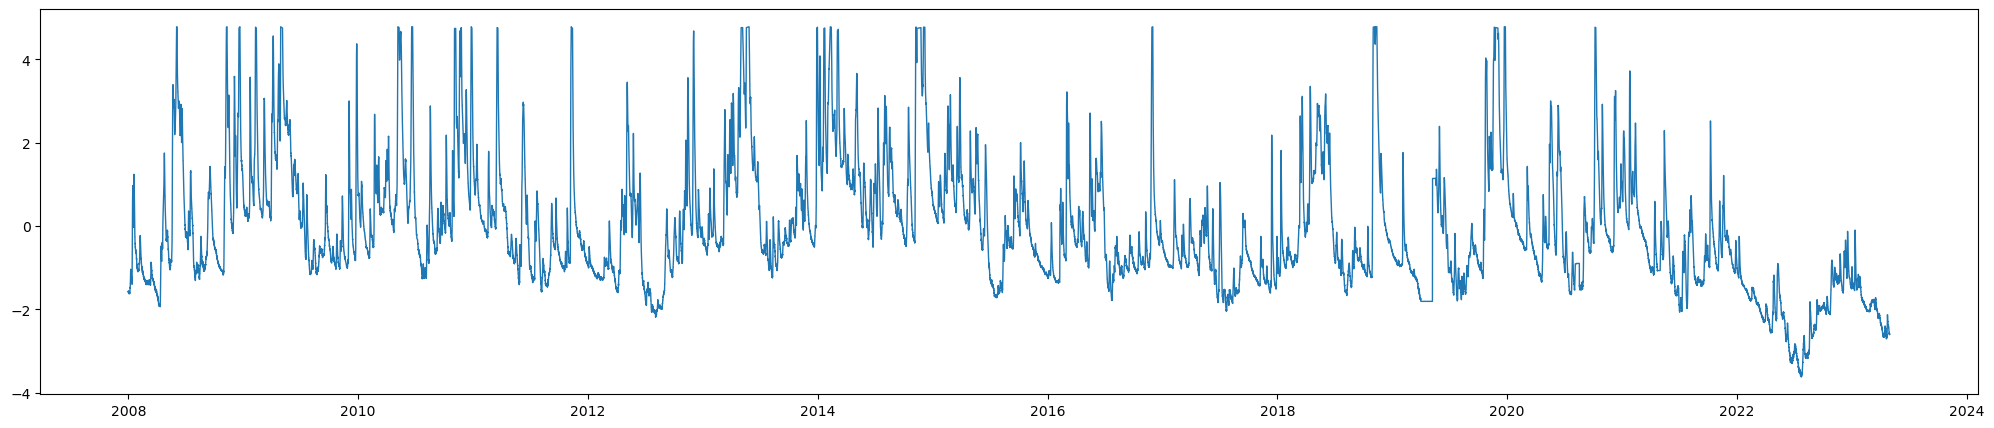

In [4]:
plt.subplots(figsize=(25, 5))
plt.plot(data1_castelmassa['Orario'], De, linewidth=1)


In [5]:
df = data1_castelmassa
df['date'] = pd.to_datetime(df['Orario'])  # Convert 'date' column to DateTime
monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Delta'].mean()
yearly_avg = monthly_avg.groupby(level=0).mean()

In [6]:
# Convert monthly_avg Series to a DataFrame
df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')

print(df)

     Year Month   Average       Date
0    2008     1 -0.677610 2008-01-01
1    2008     2 -1.054299 2008-02-01
2    2008     3 -1.337235 2008-03-01
3    2008     4 -0.632144 2008-04-01
4    2008     5  0.669555 2008-05-01
..    ...   ...       ...        ...
179  2022    12 -1.070055 2022-12-01
180  2023     1 -1.289074 2023-01-01
181  2023     2 -1.929612 2023-02-01
182  2023     3 -1.949679 2023-03-01
183  2023     4 -2.489450 2023-04-01

[184 rows x 4 columns]


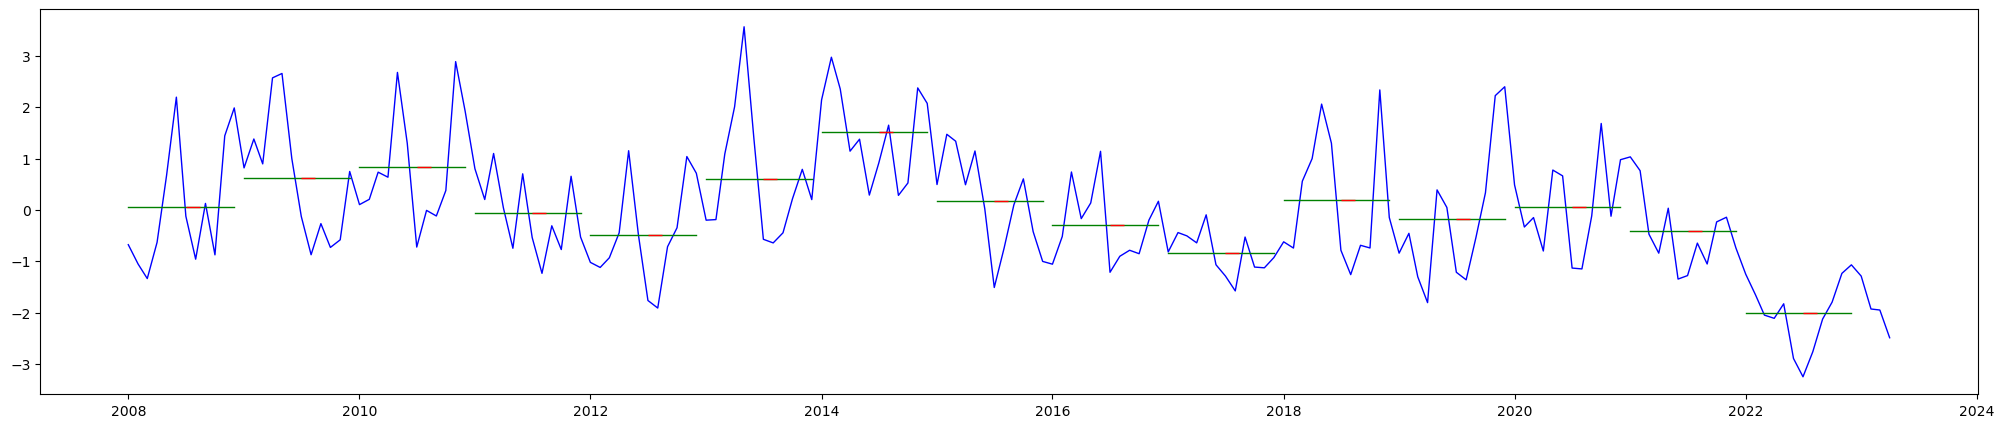

In [7]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i],np.ones(np.size(df['Average'][i-12:i]))*np.mean(df['Average'][i-12:i]),color='green', linewidth=1)

for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-6],np.mean(df['Average'][i-12:i]),color='red', marker=1, markersize=10)


[-0.44194765  0.95879736  4.84361581  0.08208896]


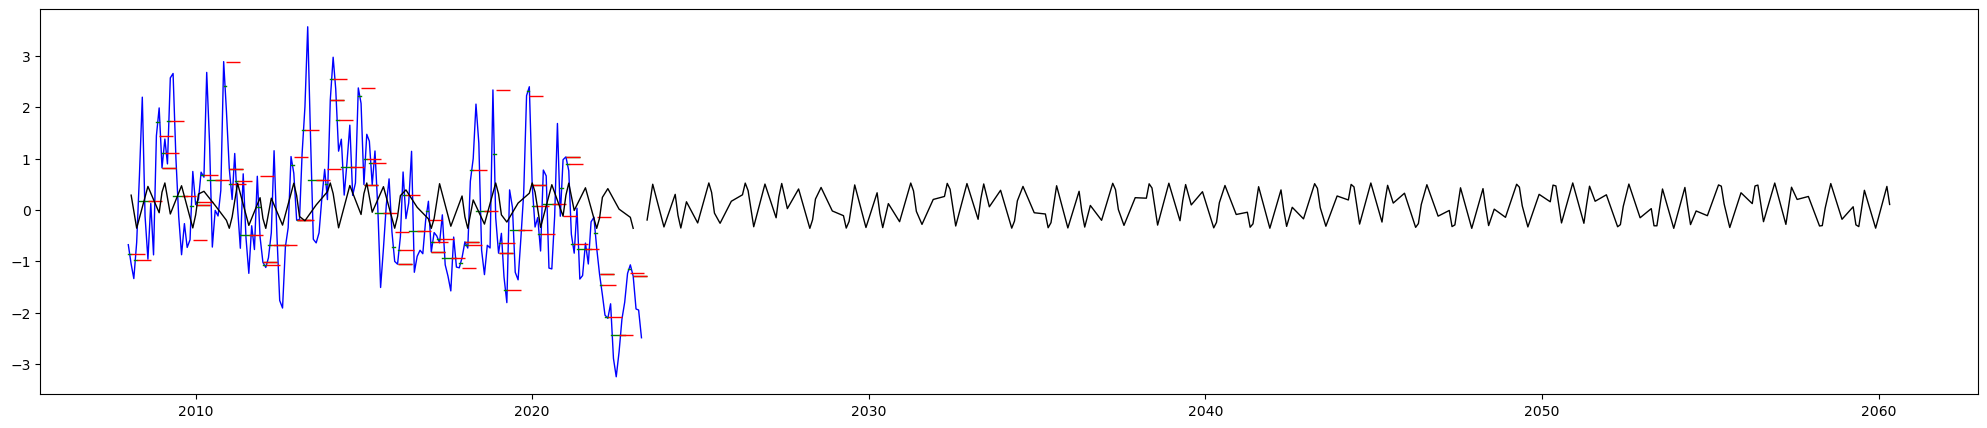

In [37]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Average'][i-12:i-10]))*np.mean(df['Average'][i-12:i-10]),color='green', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Average'][i-10:i-8]))*np.mean(df['Average'][i-10:i-8]),color='green', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Average'][i-8:i-2]))*np.mean(df['Average'][i-8:i-2]),color='green', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Average'][i-2:i]))*np.mean(df['Average'][i-2:i]),color='green', linewidth=1)
    plt.plot(df['Date'][i],df['Average'][i],color='green', marker=1, markersize=10)

x = []
y = []
for i in range(12,np.size(df['Date']),12):
    #x.append(df['Date'][i-11])
    #x.append(df['Date'][i-9])
    #x.append(df['Date'][i-5])
    #x.append(df['Date'][i-1])
    #x.append(df['Date'][i])
    x.append(i-11)
    x.append(i-9)
    x.append(i-5)
    x.append(i-1)
    x.append(i)
    y.append(np.mean(df['Average'][i-12:i-10])) 
    y.append(np.mean(df['Average'][i-10:i-8])) 
    y.append(np.mean(df['Average'][i-8:i-2])) 
    y.append(np.mean(df['Average'][i-2:i-1])) 
    y.append(df['Average'][i]) 

    plt.plot(df['Date'][i-11],np.mean(df['Average'][i-12:i-10]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-9],np.mean(df['Average'][i-10:i-8]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-5],np.mean(df['Average'][i-8:i-2]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i-1],np.mean(df['Average'][i-2:i-1]),color='red', marker=1, markersize=10)
    plt.plot(df['Date'][i],df['Average'][i],color='red', marker=1, markersize=10)

def objective(x, a, b, c, d):
    return a * np.sin(b*x+c) + d

import scipy
# fit curve
popt, _ = scipy.optimize.curve_fit(objective, x, y)
print(popt)

# unpack optima parameters for the objective function
a, b, c, d = popt

y_new = []
# use optimal parameters to calculate new values
for j in range(np.size(x)):
    y_new.append( objective(x[j], a, b, c, d) ) 

plt.plot(df['Date'][x],y_new,color='black', linewidth=1)


new_date = pd.read_excel('Dati_po/Date.xlsx')
new_date = new_date.Date
new_x = []
pos = []
# use optimal parameters to calculate new values
for j in range(192,180+np.size(new_date),12):
    pos.append(j-11-180)
    pos.append(j-9-180)
    pos.append(j-5-180)
    pos.append(j-1-180)
    pos.append(j-180)
    new_x.append(j-11)
    new_x.append(j-9)
    new_x.append(j-5)
    new_x.append(j-1)
    new_x.append(j)
    
y_NEW = []
for j in range(np.size(new_x)):
    y_NEW.append( objective(new_x[j], a, b, c, d) ) 

plt.plot(pd.to_datetime(new_date[pos]),y_NEW,color='black', linewidth=1)


[0.08935474424331183, 0.08705654947959231, 0.08435599027943394, 0.07363489032667134, 0.07181162745802791]


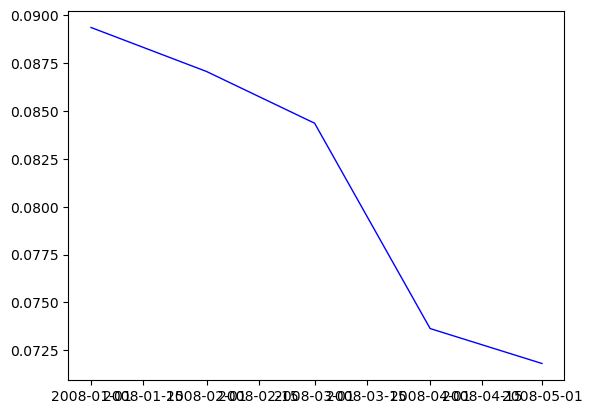

In [70]:
v = []
for i in range(0,5):
    step=np.arange(i,5*(2060-2008),5)
    v.append( np.mean( [(y_new+y_NEW)[i] for i in step] ) )
print(v)
plt.plot([df['Date'][j] for j in range(0,5)],v,color='blue', linewidth=1)

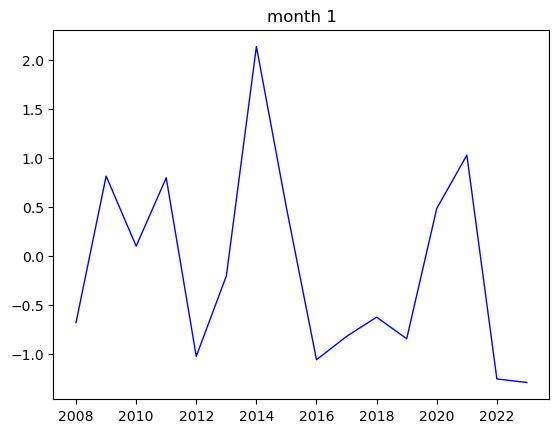

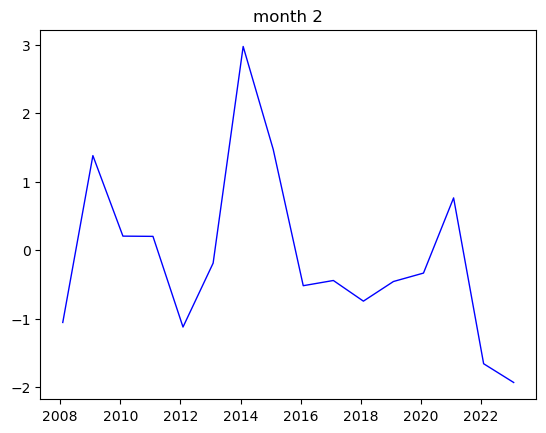

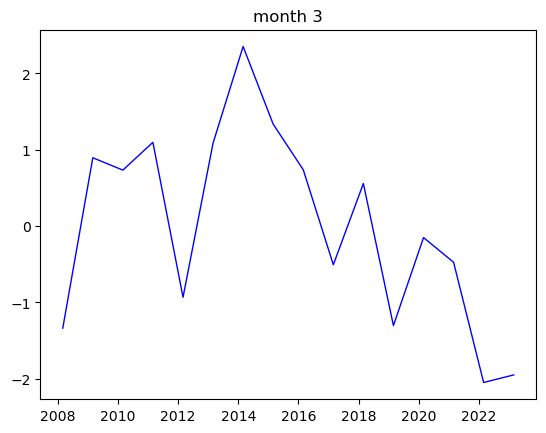

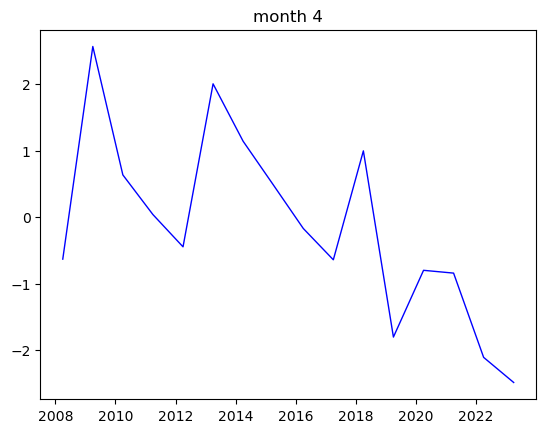

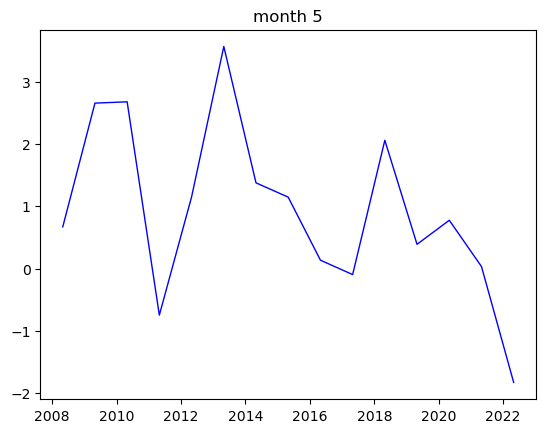

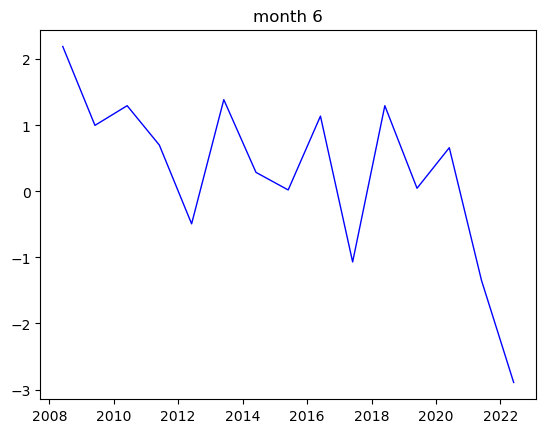

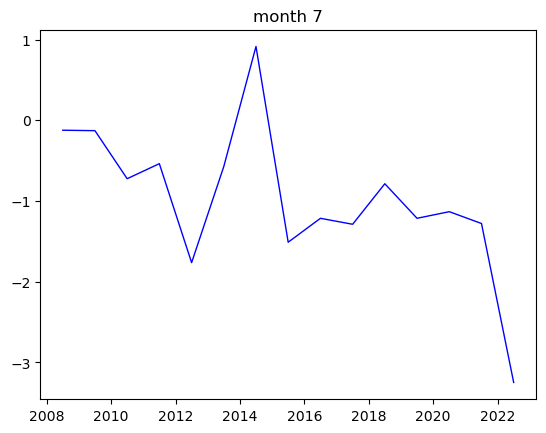

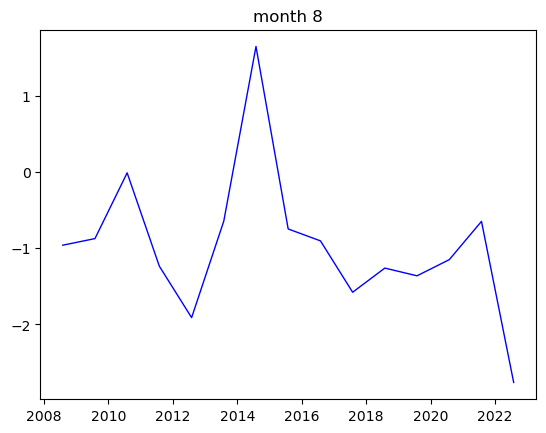

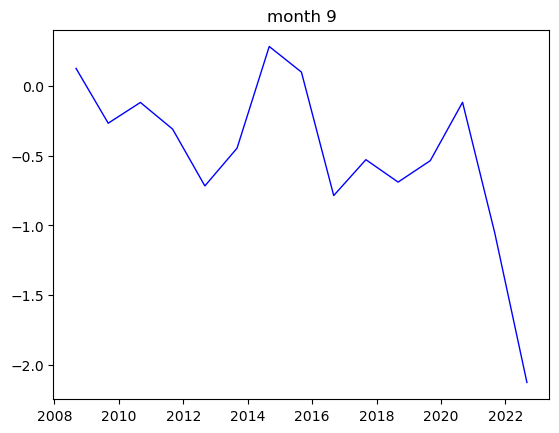

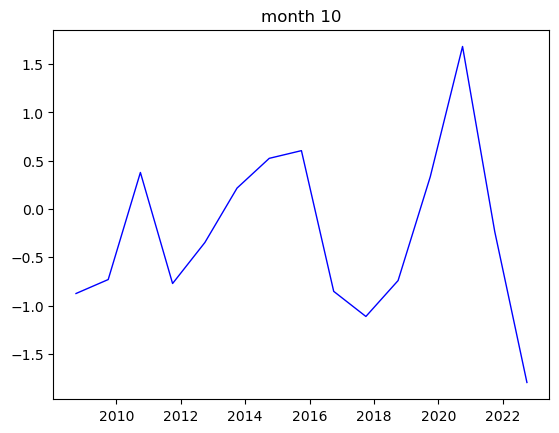

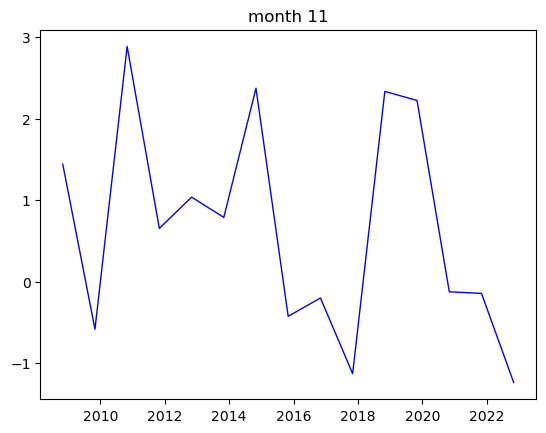

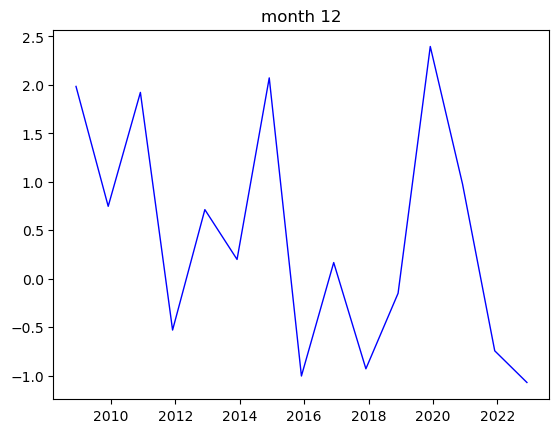

In [9]:
for i in range(1,13):
    indexes=np.where(np.int32(df['Month'])==i)[0]
    plt.plot(df['Date'][indexes],df['Average'][indexes],color='blue', linewidth=1)
    plt.title('month ' + str(i))
    plt.show()

In [10]:
# Funzione da minimizzare
def model(params, x):
    A, w, theta = params
    return A * np.sin(w * x + theta)

In [11]:
# Funzione di errore
def error(params, x, y):
    return model(params, x) - y

In [12]:
from scipy.optimize import least_squares

# Dati di input
values = df['Average']  # Inserisci qui i tuoi valori giornalieri
x = np.arange(len(values))  # Creazione dell'array degli indici
y = np.array(values)  # Creazione dell'array dei valori giornalieri

# Parametri iniziali
params0 = [1.0, 1.0, 0.0]  # Valori iniziali per A, w e theta

# Ottimizzazione
result = least_squares(error, params0, args=(x, y))

# Parametri ottimizzati
A_opt, w_opt, theta_opt = result.x

er = 99999999
x = np.arange(len(df['Average']))
for A in np.arange(np.min(df['Average']),np.max(df['Average']),0.1):
    for w in np.arange(-np.pi,np.pi,0.1):
        for theta in np.arange(-3,3,0.1):
            err = np.linalg.norm( A*np.sin(w*x+theta) - df['Average'] )
            if err < er:
                er = err
                A_opt = A
                w_opt = w
                theta_opt = theta

print("Parametri ottimizzati:")
print("A =", A_opt)
print("w =", w_opt)
print("theta =", theta_opt)

Parametri ottimizzati:
A = 0.5507381519154175
w = -1.0415926535897913
theta = -0.8999999999999981


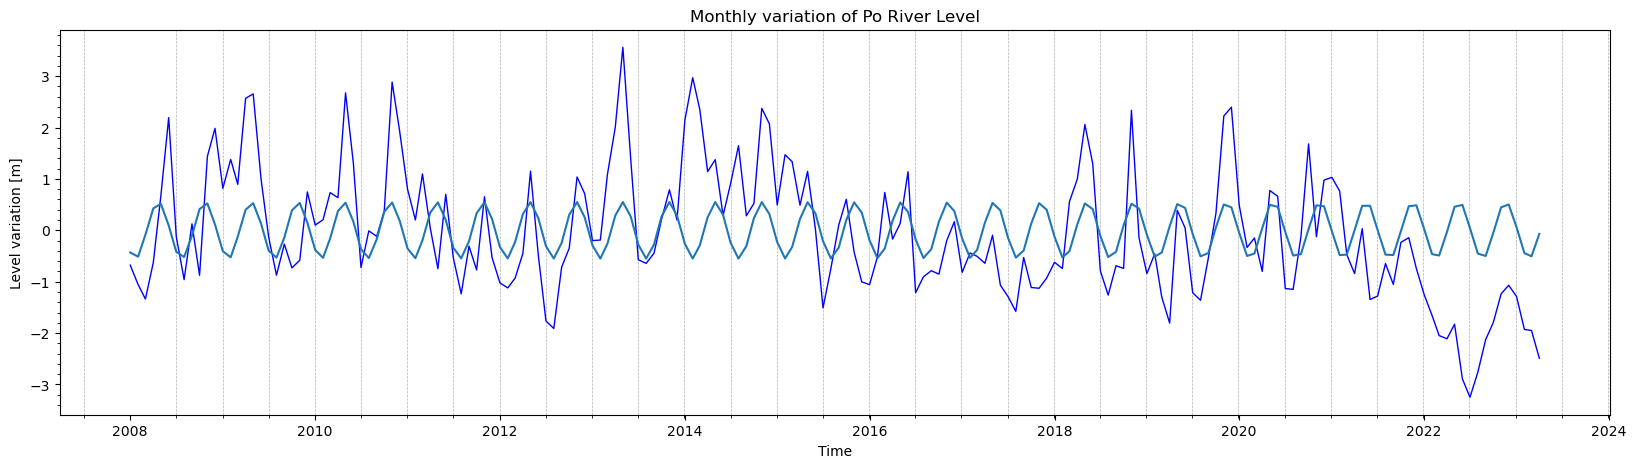

In [13]:
plt.subplots(figsize=(20, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
plt.title('Monthly variation of Po River Level')
plt.xlabel('Time')
plt.ylabel('Level variation [m]')

xx=list(range(len(df['Average'])))
sinfx=[]
for x in xx:
    #sinfx.append(-math.sin(math.pi*x/3)*sigma+mean-x*0.005)
    sinfx.append( A_opt*np.sin(w_opt*x+theta_opt) )
plt.plot(df['Date'],sinfx)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)